In [7]:
import matplotlib
import tensorflow as tf
import os, sys, struct
import example_pb2
import io
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from os.path import dirname, abspath, join
from vlkit.io import bytes2array, array2bytes

from tfrecord_dataset import TFRecordDataset

In [16]:
f = open('tfrecords/00000-of-00012.tfrecord', 'rb')

In [17]:
f.seek(1064588)

1064588

In [18]:
byte_len_crc = f.read(12)
proto_len = struct.unpack('Q', byte_len_crc[:8])[0]
pb_data = f.read(proto_len)

In [19]:
proto_len + 16

76042

In [20]:
example = example_pb2.Example()
example.ParseFromString(pb_data)

76026

In [21]:
example.ParseFromString(pb_data)

76026

In [22]:
for k, v in example.features.feature.items():
    if k == 'filename':
        filename = v.bytes_list.value[0].decode('utf-8')
        print(filename)
    elif k == 'image':
        image = np.array(Image.open(io.BytesIO(v.bytes_list.value[0])))
        print(image.shape)
    elif k == 'attribute':
        # attribute = np.frombuffer(v.bytes_list.value[0], dtype=np.float32)
        array = bytes2array(v.bytes_list.value[0])
        print(k, array.shape, array.dtype)
    elif k == 'shape':
        print(k, v.bytes_list.value)

(481, 321, 3)
attribute (10, 10) float64
../../data/images/2018.jpg


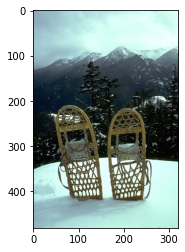

In [114]:
plt.imshow(image)

In [115]:
attribute.dtype

dtype('float32')

In [116]:
attribute

array([0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876809,
       0.12876809, 0.12876809, 0.12876809, 0.12876809, 0.12876

In [10]:
np.random.random((10,2)).tolist()

[[0.17576374597752964, 0.04458504074588243],
 [0.6062766068889673, 0.3500723609835463],
 [0.8062326372226447, 0.5978902706767686],
 [0.14619273016534862, 0.8625807253272588],
 [0.7367621694560548, 0.9646596808549135],
 [0.357548288854728, 0.48446196976958444],
 [0.7927205826345696, 0.46029922078608476],
 [0.4053692986168195, 0.19266882818889064],
 [0.8200849999588101, 0.26918316264183906],
 [0.04979906036449744, 0.5487285608286673]]

In [12]:
np.random.randn(10)

array([-0.28533712,  0.49306404, -1.9635914 , -1.08288549,  0.59659933,
       -0.89544196, -0.97418548, -0.55367051, -0.42710994, -0.83953764])

In [6]:
def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

In [7]:
_float_feature(np.random.randn(10))

TypeError: array([-1.19338889, -0.38074458, -0.58630153, -0.08756327,  1.24714438,
        0.10964319,  1.01343 has type numpy.ndarray, but expected one of: int, long, float

In [8]:
tf.train.FloatList(value=np.random.randn(10).tolist())

value: 0.25462353229522705
value: -0.9839569330215454
value: -1.6600314378738403
value: -0.46106529235839844
value: -0.08041630685329437
value: -0.7143391966819763
value: 0.7504395842552185
value: -0.3173344135284424
value: -1.3768242597579956
value: 0.020346201956272125